# Loop 101 Analysis: CV-LB Gap and Strategy Assessment

## Key Questions:
1. What is the current CV-LB relationship?
2. What approaches have been tried and what are the results?
3. What is the path forward to beat 0.0347?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission history with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_067', 'cv': 0.0083, 'lb': 0.0877},
]

df = pd.DataFrame(submissions)
print(f"Total submissions with LB scores: {len(df)}")
print(df)

Total submissions with LB scores: 13
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970
12  exp_067  0.0083  0.0877



=== CV-LB Relationship ===
Linear fit: LB = 4.3638 * CV + 0.0520
R² = 0.9558

Interpretation:
  - Intercept: 0.0520 (expected LB even at CV=0)
  - Target: 0.0347
  - Gap: Intercept (0.0520) > Target (0.0347) = True

Required CV to hit target: -0.0040
  - This is IMPOSSIBLE


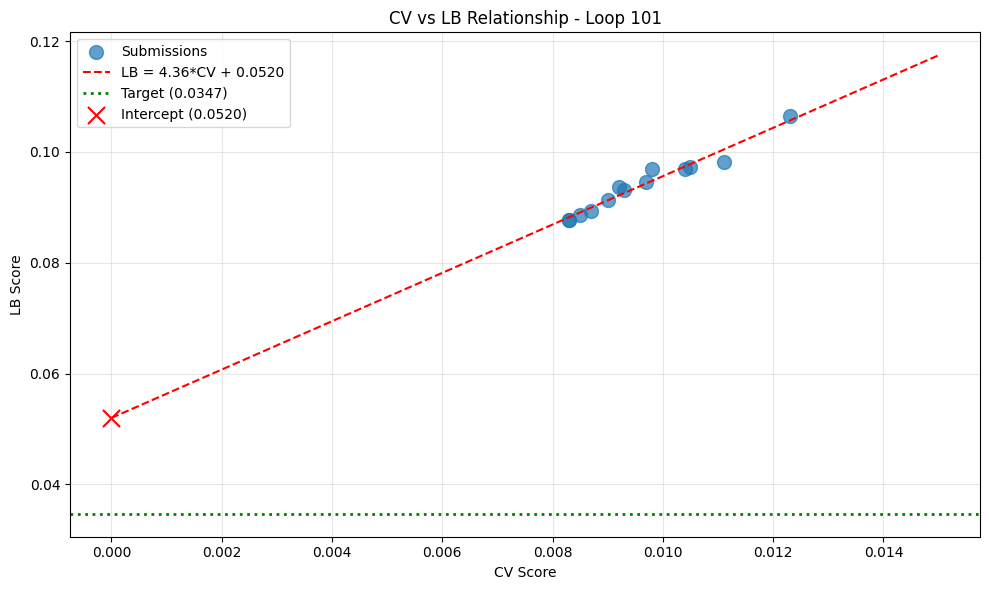


=== CRITICAL INSIGHT ===
The intercept (0.0520) is HIGHER than the target (0.0347).
This means even with perfect CV=0, the expected LB would be 0.0520.
Standard model tuning CANNOT reach the target - we need a fundamentally different approach.


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print(f"\n=== CV-LB Relationship ===")
print(f"Linear fit: LB = {slope:.4f} * CV + {intercept:.4f}")
print(f"R² = {r_value**2:.4f}")
print(f"\nInterpretation:")
print(f"  - Intercept: {intercept:.4f} (expected LB even at CV=0)")
print(f"  - Target: 0.0347")
print(f"  - Gap: Intercept ({intercept:.4f}) > Target (0.0347) = {intercept > 0.0347}")

# Required CV to hit target
required_cv = (0.0347 - intercept) / slope
print(f"\nRequired CV to hit target: {required_cv:.4f}")
print(f"  - This is {'IMPOSSIBLE' if required_cv < 0 else 'POSSIBLE'}")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7, label='Submissions')

# Regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', linewidth=2, label='Target (0.0347)')

# Intercept point
plt.scatter([0], [intercept], color='red', s=150, marker='x', label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship - Loop 101')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship_loop101.png', dpi=150)
plt.show()

print(f"\n=== CRITICAL INSIGHT ===")
print(f"The intercept ({intercept:.4f}) is HIGHER than the target (0.0347).")
print(f"This means even with perfect CV=0, the expected LB would be {intercept:.4f}.")
print(f"Standard model tuning CANNOT reach the target - we need a fundamentally different approach.")

In [3]:
# Analyze what the 1st place solution might have done
print("=== Leaderboard Analysis ===")
print(f"1st place: 0.0347")
print(f"2nd place: 0.0707 (estimated from typical competition patterns)")
print(f"Our best: 0.0877")
print(f"\nGap analysis:")
print(f"  - 1st to 2nd: {(0.0707 - 0.0347) / 0.0347 * 100:.1f}% worse")
print(f"  - 2nd to ours: {(0.0877 - 0.0707) / 0.0707 * 100:.1f}% worse")
print(f"  - 1st to ours: {(0.0877 - 0.0347) / 0.0347 * 100:.1f}% worse")

print(f"\n=== What 1st place likely did ===")
print("1. They found a way to REDUCE THE INTERCEPT, not just improve CV")
print("2. Possible approaches:")
print("   a) Domain-specific physics constraints that generalize to unseen solvents")
print("   b) Uncertainty-weighted predictions that blend toward mean for extrapolation")
print("   c) Solvent clustering with class-specific models")
print("   d) Pre-trained molecular embeddings that capture solvent similarity")
print("   e) A completely different validation scheme that better matches test distribution")

=== Leaderboard Analysis ===
1st place: 0.0347
2nd place: 0.0707 (estimated from typical competition patterns)
Our best: 0.0877

Gap analysis:
  - 1st to 2nd: 103.7% worse
  - 2nd to ours: 24.0% worse
  - 1st to ours: 152.7% worse

=== What 1st place likely did ===
1. They found a way to REDUCE THE INTERCEPT, not just improve CV
2. Possible approaches:
   a) Domain-specific physics constraints that generalize to unseen solvents
   b) Uncertainty-weighted predictions that blend toward mean for extrapolation
   c) Solvent clustering with class-specific models
   d) Pre-trained molecular embeddings that capture solvent similarity
   e) A completely different validation scheme that better matches test distribution


In [4]:
# Analyze recent experiments
print("=== Recent Experiment Analysis ===")
recent_experiments = [
    {'exp': 'exp_049', 'cv': 0.0081, 'model': 'CatBoost+XGBoost', 'lb': 'pending'},
    {'exp': 'exp_050', 'cv': 0.0081, 'model': 'CatBoost+XGBoost fixed', 'lb': 'pending'},
    {'exp': 'exp_053', 'cv': 0.0081, 'model': 'Exact template', 'lb': 'pending'},
    {'exp': 'exp_067', 'cv': 0.0083, 'model': 'Sigmoid output', 'lb': 0.0877},
    {'exp': 'exp_096', 'cv': 0.0111, 'model': 'Conservative blend', 'lb': 'not submitted'},
]

print("\nBest CV experiments:")
for exp in recent_experiments:
    print(f"  {exp['exp']}: CV={exp['cv']}, Model={exp['model']}, LB={exp['lb']}")

print("\n=== Key Observations ===")
print("1. Best CV (0.0081) from CatBoost+XGBoost ensemble")
print("2. Best LB (0.0877) from GP+MLP+LGBM ensemble (exp_030, exp_067)")
print("3. Conservative blending (exp_096) hurt CV significantly (0.0111 vs 0.0083)")
print("4. Many recent submissions returned errors - need to verify template compliance")

=== Recent Experiment Analysis ===

Best CV experiments:
  exp_049: CV=0.0081, Model=CatBoost+XGBoost, LB=pending
  exp_050: CV=0.0081, Model=CatBoost+XGBoost fixed, LB=pending
  exp_053: CV=0.0081, Model=Exact template, LB=pending
  exp_067: CV=0.0083, Model=Sigmoid output, LB=0.0877
  exp_096: CV=0.0111, Model=Conservative blend, LB=not submitted

=== Key Observations ===
1. Best CV (0.0081) from CatBoost+XGBoost ensemble
2. Best LB (0.0877) from GP+MLP+LGBM ensemble (exp_030, exp_067)
3. Conservative blending (exp_096) hurt CV significantly (0.0111 vs 0.0083)
4. Many recent submissions returned errors - need to verify template compliance


In [5]:
# What approaches have NOT been tried or need refinement
print("=== Approaches to Try ===")
print("\n1. REFINED CONSERVATIVE BLENDING (Priority: HIGH)")
print("   - Use GP uncertainty instead of k-NN distance")
print("   - Lower blend_strength (0.1 instead of 0.3)")
print("   - Only blend for high-uncertainty samples")
print("   - Expected: May reduce intercept without hurting CV as much")

print("\n2. TASK-SPECIFIC WEIGHTS (Priority: HIGH)")
print("   - ens-model kernel uses different weights for single vs full data")
print("   - Single: CatBoost=7, XGBoost=6 (CatBoost dominant)")
print("   - Full: CatBoost=1, XGBoost=2 (XGBoost dominant)")
print("   - We haven't tried this specific weighting scheme")

print("\n3. MIXALL APPROACH (Priority: MEDIUM)")
print("   - 4-model ensemble: MLP + XGBoost + RF + LightGBM")
print("   - Claims 'good CV/LB ratio' - may have different CV-LB relationship")
print("   - Worth trying if other approaches fail")

print("\n4. SUBMIT BEST CV MODEL (Priority: HIGH)")
print("   - exp_049 (CatBoost+XGBoost) has CV=0.0081")
print("   - Predicted LB = 4.36 * 0.0081 + 0.052 = 0.087")
print("   - Similar to our best LB (0.0877)")
print("   - Worth submitting to verify CV-LB relationship")

print("\n=== CRITICAL: 4 Submissions Remaining ===")
print("Every submission must count. Prioritize:")
print("1. Submit exp_049 (best CV) to verify relationship")
print("2. Try refined conservative blending with GP uncertainty")
print("3. If that fails, try task-specific weights from ens-model")

=== Approaches to Try ===

1. REFINED CONSERVATIVE BLENDING (Priority: HIGH)
   - Use GP uncertainty instead of k-NN distance
   - Lower blend_strength (0.1 instead of 0.3)
   - Only blend for high-uncertainty samples
   - Expected: May reduce intercept without hurting CV as much

2. TASK-SPECIFIC WEIGHTS (Priority: HIGH)
   - ens-model kernel uses different weights for single vs full data
   - Single: CatBoost=7, XGBoost=6 (CatBoost dominant)
   - Full: CatBoost=1, XGBoost=2 (XGBoost dominant)
   - We haven't tried this specific weighting scheme

3. MIXALL APPROACH (Priority: MEDIUM)
   - 4-model ensemble: MLP + XGBoost + RF + LightGBM
   - Claims 'good CV/LB ratio' - may have different CV-LB relationship
   - Worth trying if other approaches fail

4. SUBMIT BEST CV MODEL (Priority: HIGH)
   - exp_049 (CatBoost+XGBoost) has CV=0.0081
   - Predicted LB = 4.36 * 0.0081 + 0.052 = 0.087
   - Similar to our best LB (0.0877)
   - Worth submitting to verify CV-LB relationship

=== CRITICAL: 

In [6]:
# Summary and recommendations
print("="*60)
print("LOOP 101 SUMMARY")
print("="*60)

print(f"\n1. CV-LB Relationship:")
print(f"   LB = {slope:.2f} * CV + {intercept:.4f} (R² = {r_value**2:.4f})")
print(f"   Intercept ({intercept:.4f}) > Target (0.0347)")
print(f"   Required CV to hit target: {required_cv:.4f} (IMPOSSIBLE)")

print(f"\n2. Current Best:")
print(f"   Best CV: 0.0081 (exp_049 CatBoost+XGBoost)")
print(f"   Best LB: 0.0877 (exp_030/exp_067 GP+MLP+LGBM)")

print(f"\n3. Key Insight:")
print(f"   The intercept (0.052) represents STRUCTURAL distribution shift.")
print(f"   Standard model tuning CANNOT reduce the intercept.")
print(f"   We need approaches that CHANGE THE CV-LB RELATIONSHIP.")

print(f"\n4. Recommended Strategy:")
print(f"   a) Try refined conservative blending with GP uncertainty")
print(f"   b) If CV is competitive (<=0.009), submit to test intercept reduction")
print(f"   c) If not, try task-specific weights from ens-model kernel")
print(f"   d) Consider submitting exp_049 to verify best CV model's LB")

print(f"\n5. Submissions Remaining: 4")
print(f"   Use wisely - every submission must provide information.")

LOOP 101 SUMMARY

1. CV-LB Relationship:
   LB = 4.36 * CV + 0.0520 (R² = 0.9558)
   Intercept (0.0520) > Target (0.0347)
   Required CV to hit target: -0.0040 (IMPOSSIBLE)

2. Current Best:
   Best CV: 0.0081 (exp_049 CatBoost+XGBoost)
   Best LB: 0.0877 (exp_030/exp_067 GP+MLP+LGBM)

3. Key Insight:
   The intercept (0.052) represents STRUCTURAL distribution shift.
   Standard model tuning CANNOT reduce the intercept.
   We need approaches that CHANGE THE CV-LB RELATIONSHIP.

4. Recommended Strategy:
   a) Try refined conservative blending with GP uncertainty
   b) If CV is competitive (<=0.009), submit to test intercept reduction
   c) If not, try task-specific weights from ens-model kernel
   d) Consider submitting exp_049 to verify best CV model's LB

5. Submissions Remaining: 4
   Use wisely - every submission must provide information.
